In [55]:
import pandas as pd
df=pd.read_csv("/content/INF2178_A3_data.csv")
df.head(10)

,fallreadingscore,fallmathscore,fallgeneralknowledgescore,springreadingscore,springmathscore,springgeneralknowledgescore,totalhouseholdincome,incomeinthousands,incomegroup
0,36.58,39.54,33.822,49.37,50.10,40.533,140000.0,140.0,3
1,50.82,44.44,38.147,83.50,58.93,37.409,120000.0,120.0,3
2,40.68,28.57,28.108,40.41,32.81,29.312,90000.0,90.0,3
3,32.57,23.57,15.404,34.14,35.25,27.382,50000.0,50.0,2
4,31.98,19.65,18.727,32.84,23.60,26.977,55000.0,55.0,2
5,50.45,36.27,33.352,64.13,53.31,32.703,150000.0,150.0,3
6,32.49,20.82,26.211,38.52,29.09,29.612,42000.0,42.0,2
7,33.30,26.85,27.072,36.72,32.22,33.730,70000.0,70.0,3
8,65.92,47.36,33.514,84.61,59.89,42.359,100000.0,100.0,3
9,34.20,22.27,28.096,39.87,27.44,32.374,78000.0,78.0,3


In [56]:
# Display information on dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11933 entries, 0 to 11932
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   fallreadingscore             11933 non-null  float64
 1   fallmathscore                11933 non-null  float64
 2   fallgeneralknowledgescore    11933 non-null  float64
 3   springreadingscore           11933 non-null  float64
 4   springmathscore              11933 non-null  float64
 5   springgeneralknowledgescore  11933 non-null  float64
 6   totalhouseholdincome         11933 non-null  float64
 7   incomeinthousands            11933 non-null  float64
 8   incomegroup                  11933 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 839.2 KB
None


In [57]:
# Check for NaN values
nan_count = df.isna().sum()
print(nan_count)

fallreadingscore               0
fallmathscore                  0
fallgeneralknowledgescore      0
springreadingscore             0
springmathscore                0
springgeneralknowledgescore    0
totalhouseholdincome           0
incomeinthousands              0
incomegroup                    0
dtype: int64


In [58]:
# Create continuous variables on General Knowledge score
df['generallknowledge'] = (df['fallgeneralknowledgescore'] + df['springgeneralknowledgescore'])/2
df['generallknowledge']

0        37.1775
1        37.7780
2        28.7100
3        21.3930
4        22.8520
          ...   
11928    15.9415
11929    26.9090
11930    18.3195
11931    32.4275
11932    16.7695
Name: generallknowledge, Length: 11933, dtype: float64

In [59]:
# Calculate Educational Improvement for reading, math, and general knowledge
df['Reading_Gain'] = df['springreadingscore'] - df['fallreadingscore']
df['Math_Gain'] = df['springmathscore'] - df['fallmathscore']
df['GeneralKnowledge_Gain'] = df['springgeneralknowledgescore'] - df['fallgeneralknowledgescore']
print (df['Reading_Gain'], df['Math_Gain'], df['GeneralKnowledge_Gain'] )

0        12.79
1        32.68
2        -0.27
3         1.57
4         0.86
         ...  
11928    13.12
11929    15.88
11930     9.49
11931    16.09
11932     7.94
Name: Reading_Gain, Length: 11933, dtype: float64 0        10.56
1        14.49
2         4.24
3        11.68
4         3.95
         ...  
11928    -1.41
11929    14.62
11930    10.50
11931    21.31
11932     3.19
Name: Math_Gain, Length: 11933, dtype: float64 0         6.711
1        -0.738
2         1.204
3        11.978
4         8.250
          ...  
11928     8.495
11929    10.896
11930     2.967
11931     7.127
11932     3.027
Name: GeneralKnowledge_Gain, Length: 11933, dtype: float64


In [60]:
# Summary Statistics
# Function for summary statistics
def get_summary_statistics(dataset, label='Dataset'):

    mean = np.round(np.mean(dataset), 2)
    median = np.round(np.median(dataset), 2)
    min_value = np.round(dataset.min(), 2)
    max_value = np.round(dataset.max(), 2)
    quartile_1 = np.round(dataset.quantile(0.25), 2)
    quartile_3 = np.round(dataset.quantile(0.75), 2)

    # Interquartile range
    iqr = np.round(quartile_3 - quartile_1, 2)

    print(f'{label} Summary Statistics:')
    print('Min: %s' % min_value)
    print('Mean: %s' % mean)
    print('Max: %s' % max_value)
    print('25th percentile: %s' % quartile_1)
    print('Median: %s' % median)
    print('75th percentile: %s' % quartile_3)
    print('Interquartile range (IQR): %s' % iqr)
    print('\n\n')

# Display summary statistics
get_summary_statistics(df['fallreadingscore'], 'Fall Reading Score')
get_summary_statistics(df['fallmathscore'], 'Fall Math Score')
get_summary_statistics(df['fallgeneralknowledgescore'], 'Fall General Knowledge Score')
get_summary_statistics(df['springreadingscore'], 'Spring Reading Score')
get_summary_statistics(df['springmathscore'], 'Spring Math Score')
get_summary_statistics(df['springgeneralknowledgescore'], 'Spring General Knowledge Score')
get_summary_statistics(df['totalhouseholdincome'], 'Total Household Income')
get_summary_statistics(df['incomeinthousands'], 'Income in Thousands')
get_summary_statistics(df['incomegroup'], 'Income Group')

Fall Reading Score Summary Statistics:
Min: 21.01
Mean: 35.95
Max: 138.51
25th percentile: 29.34
Median: 34.06
75th percentile: 39.89
Interquartile range (IQR): 10.55



Fall Math Score Summary Statistics:
Min: 10.51
Mean: 27.13
Max: 115.65
25th percentile: 20.68
Median: 25.68
75th percentile: 31.59
Interquartile range (IQR): 10.91



Fall General Knowledge Score Summary Statistics:
Min: 6.98
Mean: 23.07
Max: 47.69
25th percentile: 17.39
Median: 22.95
75th percentile: 28.3
Interquartile range (IQR): 10.91



Spring Reading Score Summary Statistics:
Min: 22.35
Mean: 47.51
Max: 156.85
25th percentile: 38.95
Median: 45.32
75th percentile: 51.77
Interquartile range (IQR): 12.82



Spring Math Score Summary Statistics:
Min: 11.9
Mean: 37.8
Max: 113.8
25th percentile: 29.27
Median: 36.41
75th percentile: 44.22
Interquartile range (IQR): 14.95



Spring General Knowledge Score Summary Statistics:
Min: 7.86
Mean: 28.24
Max: 48.34
25th percentile: 22.8
Median: 28.58
75th percentile: 33.78
Inter

In [61]:
%pip install dfply
from dfply import *
# summary statistics for dependent variable yield
summary_statistics = df >> group_by(X.incomegroup) >> summarize(n=X['generallknowledge'].count(),
                                                                mean=X['generallknowledge'].mean(),
                                                                std=X['generallknowledge'].std())
summary_statistics

,incomegroup,n,mean,std
0,1,4729,22.508588,6.684086
1,2,3726,26.515745,6.613858
2,3,3478,29.009785,6.720570


<ipython-input-64-fa2c89f8c24e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="incomegroup", y="springgeneralknowledgescore", palette="viridis", ax=axs[1])
<ipython-input-64-fa2c89f8c24e>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="incomegroup", y="fallgeneralknowledgescore", palette="viridis", ax=axs[2])


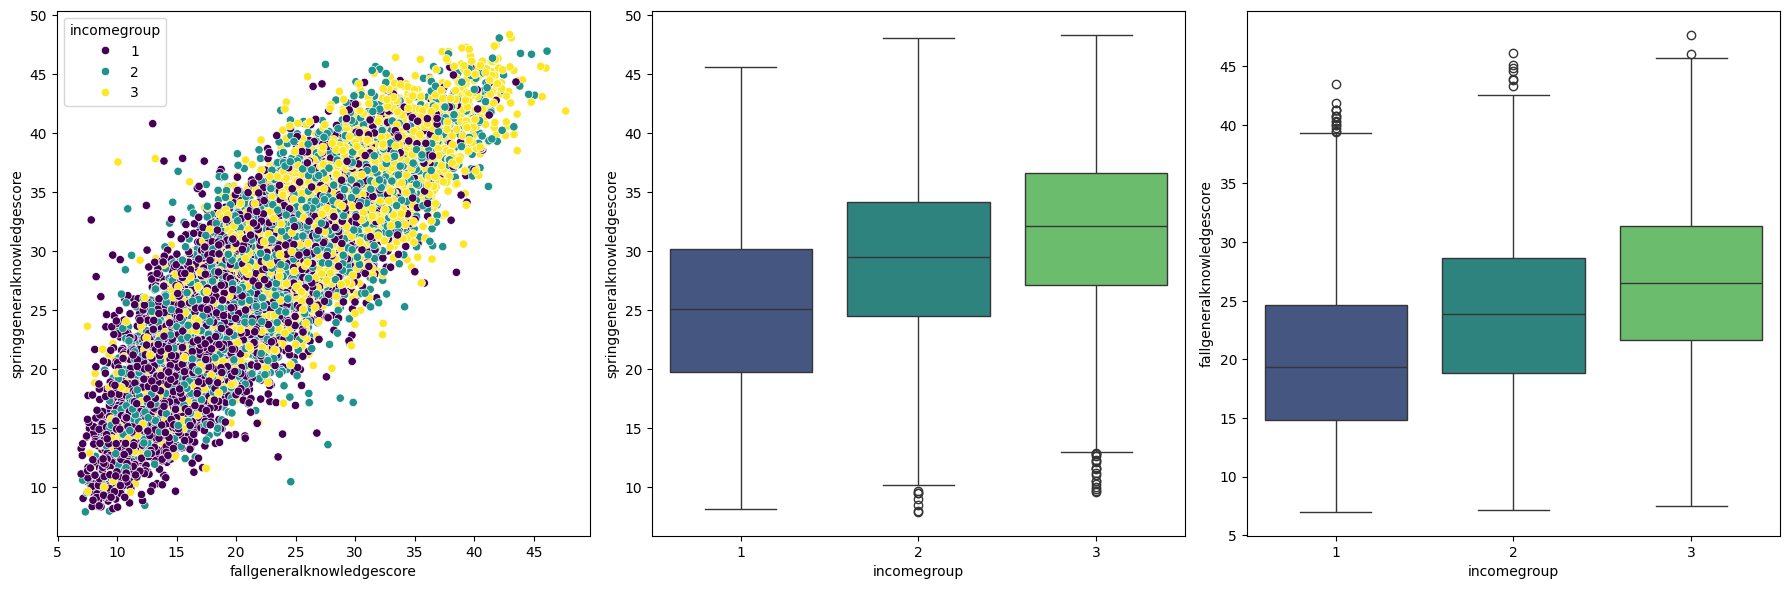

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axs = plt.subplots(ncols=3, figsize=(18, 6))
# Scatter plot for 'fallmathscore' vs 'springmathscore' colored by 'incomegroup'
sns.scatterplot(data=df, x="fallgeneralknowledgescore", y="springgeneralknowledgescore", hue="incomegroup", palette="viridis", ax=axs[0])
# Boxplot for 'springmathscore' by 'incomegroup'
sns.boxplot(data=df, x="incomegroup", y="springgeneralknowledgescore", palette="viridis", ax=axs[1])
# Boxplot for 'totalhouseholdincome' by 'incomegroup'
sns.boxplot(data=df, x="incomegroup", y="fallgeneralknowledgescore", palette="viridis", ax=axs[2])
plt.tight_layout()
plt.show()

In [65]:
%pip install pingouin
from pingouin import ancova
ancova_results = ancova(data=df, dv='springgeneralknowledgescore', covar='fallgeneralknowledgescore', between='incomegroup')
print(ancova_results)

                      Source             SS     DF             F  \
0                incomegroup    1756.904469      2     56.908040   
1  fallgeneralknowledgescore  411876.768316      1  26682.269841   
2                   Residual  184140.179925  11929           NaN   

          p-unc       np2  
0  2.525291e-25  0.009451  
1  0.000000e+00  0.691049  
2           NaN       NaN  


In [66]:
import numpy as np
import pandas as pd
data = df[['incomegroup', 'fallgeneralknowledgescore', 'springgeneralknowledgescore']].copy()
print(data.head(12))

    incomegroup  fallgeneralknowledgescore  springgeneralknowledgescore
0             3                     33.822                       40.533
1             3                     38.147                       37.409
2             3                     28.108                       29.312
3             2                     15.404                       27.382
4             2                     18.727                       26.977
5             3                     33.352                       32.703
6             2                     26.211                       29.612
7             3                     27.072                       33.730
8             3                     33.514                       42.359
9             3                     28.096                       32.374
10            1                     11.269                       14.941
11            2                     24.710                       34.898


In [67]:
from pingouin import ancova
ancova_results = ancova(data=sample_data, dv='fallgeneralknowledgescore', covar='springgeneralknowledgescore', between='incomegroup')
print(ancova_results)

                        Source             SS     DF             F  \
0                  incomegroup    2747.153046      2     93.952921   
1  springgeneralknowledgescore  390090.471962      1  26682.269841   
2                     Residual  174400.051714  11929           NaN   

          p-unc       np2  
0  3.271869e-41  0.015508  
1  0.000000e+00  0.691049  
2           NaN       NaN  


In [68]:
#ancova using statsmodels
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Perform the ANCOVA
model = ols('springgeneralknowledgescore ~ C(incomegroup) + fallgeneralknowledgescore', data=data).fit()
# Print the summary of the model
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:     springgeneralknowledgescore   R-squared:                       0.731
Model:                                     OLS   Adj. R-squared:                  0.731
Method:                          Least Squares   F-statistic:                 1.082e+04
Date:                         Sat, 23 Mar 2024   Prob (F-statistic):               0.00
Time:                                 20:36:05   Log-Likelihood:                -33259.
No. Observations:                        11933   AIC:                         6.653e+04
Df Residuals:                            11929   BIC:                         6.656e+04
Df Model:                                    3                                         
Covariance Type:                     nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

In [69]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Fit ANCOVA model
model = ols('springgeneralknowledgescore ~ C(incomegroup) + fallgeneralknowledgescore', data=data).fit()
# Print model summary
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:     springgeneralknowledgescore   R-squared:                       0.731
Model:                                     OLS   Adj. R-squared:                  0.731
Method:                          Least Squares   F-statistic:                 1.082e+04
Date:                         Sat, 23 Mar 2024   Prob (F-statistic):               0.00
Time:                                 20:36:23   Log-Likelihood:                -33259.
No. Observations:                        11933   AIC:                         6.653e+04
Df Residuals:                            11929   BIC:                         6.656e+04
Df Model:                                    3                                         
Covariance Type:                     nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

In [70]:
# Fit ANCOVA model with interaction term
model_interaction = ols('springgeneralknowledgescore ~ C(incomegroup) * fallgeneralknowledgescore', data=data).fit()
# Print model summary
print(model_interaction.summary())

                                 OLS Regression Results                                
Dep. Variable:     springgeneralknowledgescore   R-squared:                       0.732
Model:                                     OLS   Adj. R-squared:                  0.732
Method:                          Least Squares   F-statistic:                     6524.
Date:                         Sat, 23 Mar 2024   Prob (F-statistic):               0.00
Time:                                 20:37:43   Log-Likelihood:                -33236.
No. Observations:                        11933   AIC:                         6.648e+04
Df Residuals:                            11927   BIC:                         6.653e+04
Df Model:                                    5                                         
Covariance Type:                     nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------